<a href="https://colab.research.google.com/github/Davron030901/Machine_Learning/blob/main/Full_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/pollution_dataset.csv

--2024-12-27 17:14:09--  https://raw.githubusercontent.com/Davron030901/Machine_Learning/main/data/pollution_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242391 (237K) [text/plain]
Saving to: ‘pollution_dataset.csv.1’

pollution_dataset.c 100%[===================>] 236.71K  --.-KB/s    in 0.04s   

2024-12-27 17:14:09 (6.60 MB/s) - ‘pollution_dataset.csv.1’ saved [242391/242391]



In [ ]:
df=pd.read_csv('/content/pollution_dataset.csv')

In [ ]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Air Quality"]=df["Air Quality"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    5000 non-null   float64 
 1   Humidity                       5000 non-null   float64 
 2   PM2.5                          5000 non-null   float64 
 3   PM10                           5000 non-null   float64 
 4   NO2                            5000 non-null   float64 
 5   SO2                            5000 non-null   float64 
 6   CO                             5000 non-null   float64 
 7   Proximity_to_Industrial_Areas  5000 non-null   float64 
 8   Population_Density             5000 non-null   int64   
 9   Air Quality                    5000 non-null   category
dtypes: category(1), float64(8), int64(1)
memory usage: 356.8 KB


In [ ]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [ ]:
df["Air Quality"].unique()

['Moderate', 'Good', 'Hazardous', 'Poor']
Categories (4, object): ['Good', 'Hazardous', 'Moderate', 'Poor']

In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
scaler=StandardScaler()
encoder=OrdinalEncoder(dtype=np.int8,categories=[['Hazardous', 'Poor', 'Moderate','Good']])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
ct=ColumnTransformer(
    [
        ("scaler",scaler,numeric_columns),
        ("encoder",encoder,["Air Quality"])
    ],
    remainder='passthrough'
)
ct.set_output(transform="pandas")
transformed_df=ct.fit_transform(df)

In [ ]:
transformed_df.head()

,scaler__Temperature,scaler__Humidity,scaler__PM2.5,scaler__PM10,scaler__NO2,scaler__SO2,scaler__CO,scaler__Proximity_to_Industrial_Areas,scaler__Population_Density,encoder__Air Quality
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163,2
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598,2
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975,2
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770,3
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917,3


<Figure size 2000x1000 with 0 Axes>

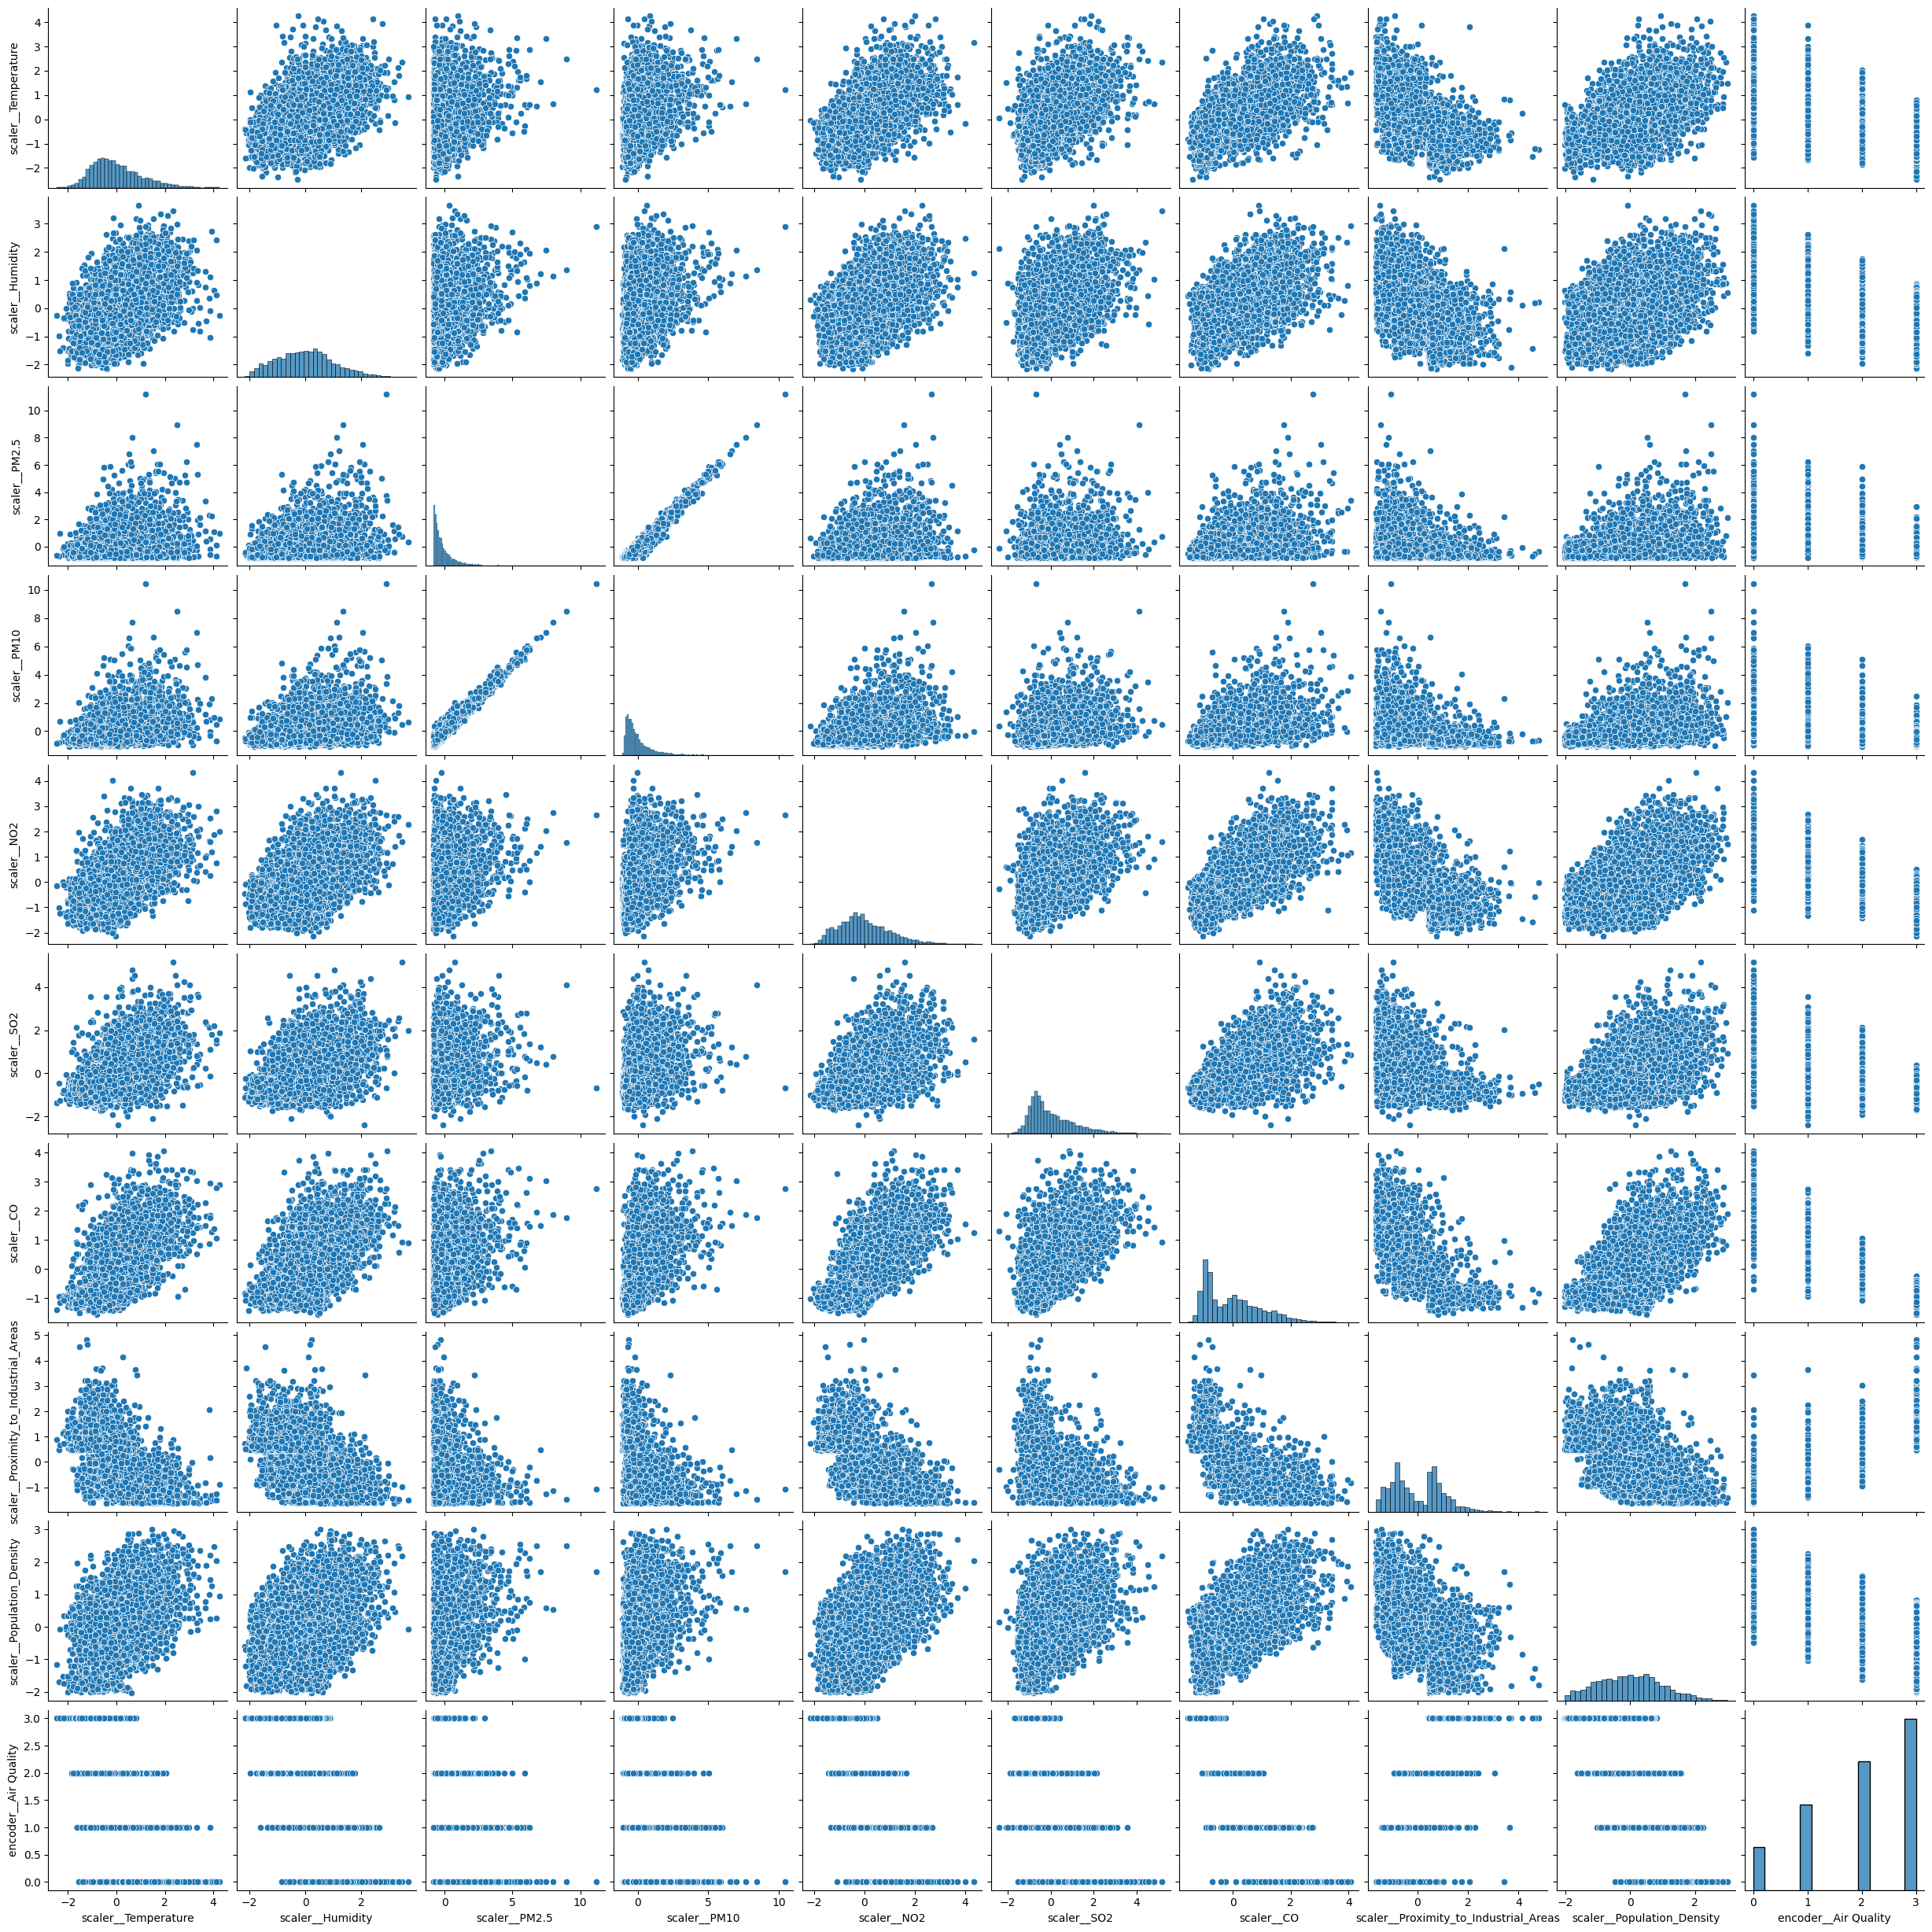

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(transformed_df)

<Axes: >

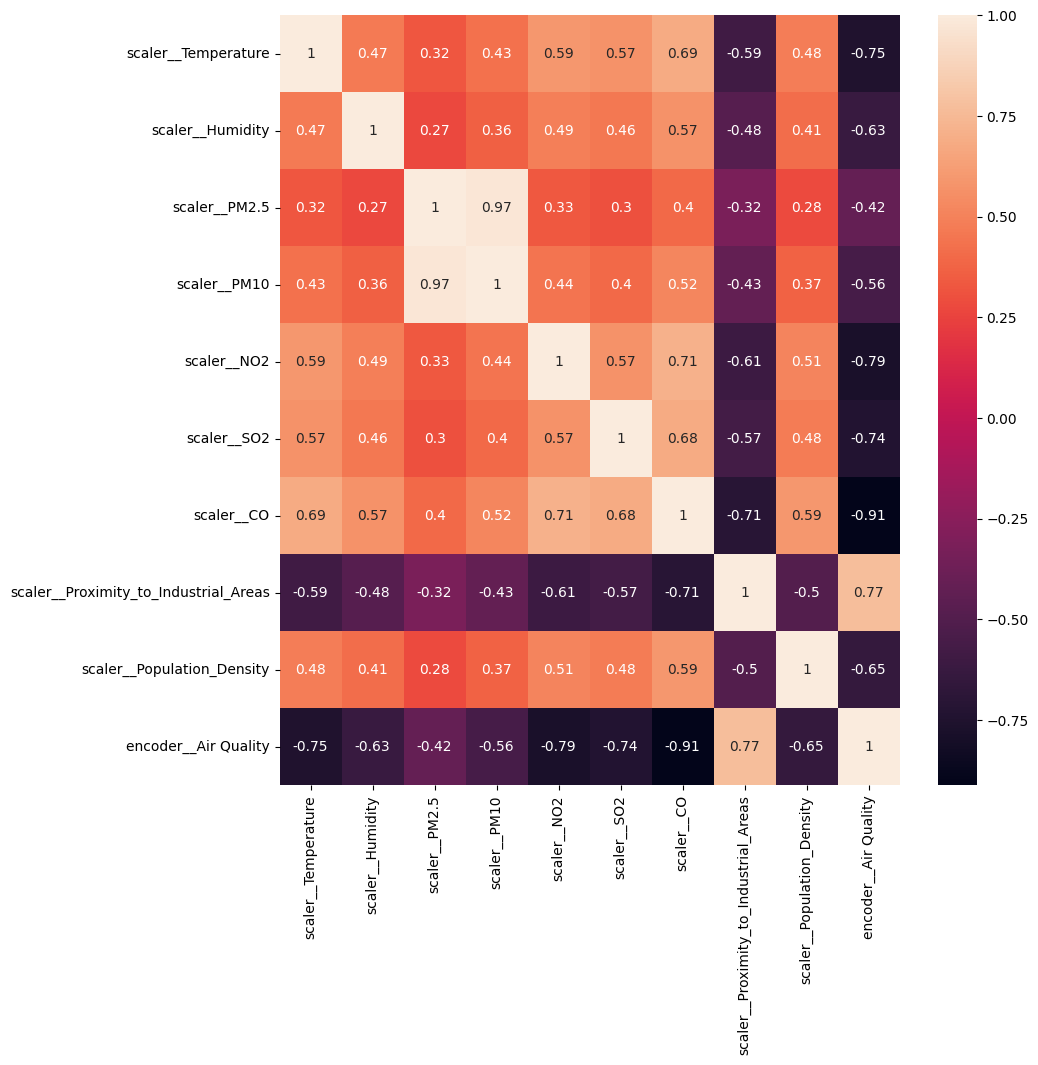

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(transformed_df.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=transformed_df.drop(columns=["encoder__Air Quality"])
y=transformed_df["encoder__Air Quality"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.942
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       148
           1       0.84      0.87      0.85       282
           2       0.95      0.95      0.95       452
           3       1.00      1.00      1.00       618

    accuracy                           0.94      1500
   macro avg       0.92      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9113333333333333
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       148
           1       0.77      0.79      0.78       282
           2       0.93      0.90      0.92       452
           3       1.00      1.00      1.00       618

    accuracy                           0.91      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.91      0.91      0.91      1500



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.948
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       148
           1       0.85      0.89      0.87       282
           2       0.96      0.95      0.96       452
           3       1.00      1.00      1.00       618

    accuracy                           0.95      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
rf=ExtraTreesClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9533333333333334
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       148
           1       0.85      0.91      0.88       282
           2       0.96      0.96      0.96       452
           3       1.00      1.00      1.00       618

    accuracy                           0.95      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.888
              precision    recall  f1-score   support

           0       0.83      0.66      0.73       148
           1       0.72      0.86      0.78       282
           2       0.89      0.90      0.89       452
           3       1.00      0.95      0.97       618

    accuracy                           0.89      1500
   macro avg       0.86      0.84      0.84      1500
weighted avg       0.90      0.89      0.89      1500



In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.94
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       148
           1       0.84      0.85      0.84       282
           2       0.95      0.95      0.95       452
           3       1.00      1.00      1.00       618

    accuracy                           0.94      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.936
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       148
           1       0.82      0.87      0.84       282
           2       0.94      0.96      0.95       452
           3       0.99      1.00      1.00       618

    accuracy                           0.94      1500
   macro avg       0.92      0.89      0.90      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9226666666666666
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       148
           1       0.79      0.85      0.82       282
           2       0.93      0.93      0.93       452
           3       1.00      0.99      0.99       618

    accuracy                           0.92      1500
   macro avg       0.90      0.88      0.89      1500
weighted avg       0.92      0.92      0.92      1500



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9466666666666667
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       148
           1       0.85      0.89      0.87       282
           2       0.97      0.95      0.96       452
           3       0.99      1.00      1.00       618

    accuracy                           0.95      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9513333333333334
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       148
           1       0.85      0.90      0.88       282
           2       0.97      0.95      0.96       452
           3       1.00      1.00      1.00       618

    accuracy                           0.95      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred=lgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2168
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 9
[LightGBM] [Info] Start training from score -2.296887
[LightGBM] [Info] Start training from score -1.584049
[LightGBM] [Info] Start training from score -1.205879
[LightGBM] [Info] Start training from score -0.929231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.9546666666666667
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       148
           1       0.86      0.91      0.88       282
           2       0.96      0.96      0.96       452
           3       1.00      1.00      1.00       618

    accuracy                           0.95      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.96

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cb=CatBoostClassifier()
cb.fit(X_train,y_train)
y_pred=cb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Learning rate set to 0.084347
0:	learn: 1.2218599	total: 83.4ms	remaining: 1m 23s
1:	learn: 1.0866829	total: 105ms	remaining: 52.6s
2:	learn: 0.9859954	total: 129ms	remaining: 42.9s
3:	learn: 0.9010524	total: 153ms	remaining: 38.2s
4:	learn: 0.8269720	total: 180ms	remaining: 35.8s
5:	learn: 0.7631194	total: 203ms	remaining: 33.7s
6:	learn: 0.7068056	total: 235ms	remaining: 33.3s
7:	learn: 0.6581386	total: 263ms	remaining: 32.7s
8:	learn: 0.6165803	total: 291ms	remaining: 32s
9:	learn: 0.5765175	total: 316ms	remaining: 31.3s
10:	learn: 0.5438620	total: 337ms	remaining: 30.3s
11:	learn: 0.5108951	total: 367ms	remaining: 30.2s
12:	learn: 0.4821249	total: 398ms	remaining: 30.2s
13:	learn: 0.4581858	total: 420ms	remaining: 29.6s
14:	learn: 0.4354404	total: 441ms	remaining: 29s
15:	learn: 0.4137861	total: 460ms	remaining: 28.3s
16:	learn: 0.3944994	total: 480ms	remaining: 27.8s
17:	learn: 0.3757636	total: 507ms	remaining: 27.7s
18:	learn: 0.3582397	total: 530ms	remaining: 27.4s
19:	learn: 0.